# Data preparation with sklearn

In this notebook, we will work with three different datasets to practice to prepare them for training a machine learning model.

Remember the main steps for doing that are:

1. Outlier removal
2. Missing values filling
3. Data normalization
4. Dealing with categorical variables

### Exercise 1

Let's assume we have a small database of flu patients. We want to make a model to predict the need of hospitalization given the characteristics of the patients. However, before we need to pre-process a little bit the data.

We have the following attributes:

* Age: stored in years
* Gender: Male / Female 
* Health status: Excelent / good / poor 
* Disease symptoms: in a scale from 0 to 10 where 0 is asymptomatic 
* Hospitalization need: 0 don't need hospitalization; 1 if they need it
    
The data is stored in lists. We provide here an example with 5 patients:

In [1]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

age = [70, 60, 35, None, 86]  # None is used to denote a missing value in Python
gender = ["Male", "Female", "Male", "Male", "Female"]  
health_status = ["Excellent", "Poor", "Poor", "Excellent", "Good"]  
disease_symptoms = [0, 7, 5, 8, 9]  
hospitalization = [0, 1, 1, 0, 0] 

<div class="alert alert-info"><b>Exercise 1.1</b> 

Create a dataframe called ```df``` that contains the provided data.
</div>

In [2]:
df = pd.DataFrame(data = {"age": age, "gender": gender, "health_status": health_status, 
                          "disease_symptoms": disease_symptoms, "hospitalization": hospitalization })
df

,age,gender,health_status,disease_symptoms,hospitalization
0,70.0,Male,Excellent,0,0
1,60.0,Female,Poor,7,1
2,35.0,Male,Poor,5,1
3,NaN,Male,Excellent,8,0
4,86.0,Female,Good,9,0


<div class="alert alert-info"><b>Exercise 1.2</b> 

Extract the features matrix and target array from the original DataFrame and store them in two new variables ```X``` and ```y```. Use column ```hospitalization``` as depedent variable.</div>

In [3]:
X = df.drop(columns = ["hospitalization"])
y = df["hospitalization"]


<div class="alert alert-info"><b>Exercise 1.3</b> 

Fill the missing values for the ```age``` column with the mean of that column

In [4]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = 'mean')
X_imputed = simple_imputer.fit_transform(X[['age']])

X['age'] = X_imputed
X

,age,gender,health_status,disease_symptoms
0,70.00,Male,Excellent,0
1,60.00,Female,Poor,7
2,35.00,Male,Poor,5
3,62.75,Male,Excellent,8
4,86.00,Female,Good,9


<div class="alert alert-info"><b>Exercise 1.4</b> 

Use the sklearn library to create a one-hot encoder for the ```gender``` attribute that results in the adding of two new columns, ```female``` and ```male```, to your dataframe. Remember to remove the original attribute.
</div>

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object and drop one category if binary
onehot_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
gender_encoded = onehot_encoder.fit_transform(X[['gender']])

# Replace the original 'gender' column with the new binary column
X['gender_encoded'] = gender_encoded

X = X.drop(columns=['gender'])

X

,age,health_status,disease_symptoms,gender_encoded
0,70.00,Excellent,0,1.0
1,60.00,Poor,7,0.0
2,35.00,Poor,5,1.0
3,62.75,Excellent,8,1.0
4,86.00,Good,9,0.0


Now, you encoded the ```gender``` attribute, you get three different columns containing the encoded values. Add them in the dataframe ```X``` with the appropriate names.

<div class="alert alert-warning">
Hint 1:  Encoded columns are in lexicographical order.
</div>
<div class="alert alert-warning">
    
Hint 2:  Remember to drop the non-encoded attribute from ```X```.
</div>

<div class="alert alert-info"><b>Exercise 1.5</b> 

Use the sklearn library to create an integer encoder for the ```health_status``` attribute. Store the new variable in a column called ```health_status_ENC``` and remove the original column.</div>

In [6]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Excellent', 'Good', 'Poor']]

ordinal_encoder = OrdinalEncoder(categories = categories)
health_status_encoded = ordinal_encoder.fit_transform(X[['health_status']])

X['health_status_ENC'] = health_status_encoded
X = X.drop(columns = ['health_status'])

X

,age,disease_symptoms,gender_encoded,health_status_ENC
0,70.00,0,1.0,0.0
1,60.00,7,0.0,2.0
2,35.00,5,1.0,2.0
3,62.75,8,1.0,0.0
4,86.00,9,0.0,1.0


<div class="alert alert-warning">
    
Hint:  Remember to drop the non-encoded attribute from ```X```.
</div>

<div class="alert alert-info"><b>Exercise 1.6</b> 

Write the code to normalize the dataset ```X``` using the StandarScaler from the sklearn library.
</div>

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

,age,disease_symptoms,gender_encoded,health_status_ENC
0,0.437869,-1.819622,0.816497,-1.118034
1,-0.166088,0.376473,-1.224745,1.118034
2,-1.675980,-0.250982,0.816497,1.118034
3,0.000000,0.690201,0.816497,-1.118034
4,1.404200,1.003929,-1.224745,0.000000


## Exercise 2

In the following link, you can download a dataset that contains sociodemographic about different family structures.

https://raw.githubusercontent.com/jnin/information-systems/main/data/social_class.csv

The data are presented in a CSV format. You will need to load it using the ```read_csv``` Pandas function. 

The dataset contains the following attributes:

* gender
* num_children
* income
* social_class

<div class="alert alert-info"><b>Exercise 2.1</b> 

Create a dataframe called ```df``` that contains the provided data.</div>

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/social_class.csv')
df

,gender,num_children,income,social_class
0,Female,4,2500.0,Middle-Lower
1,Hombre,1,3002.3,Middle-Middle
2,Hombre,1,4274.1,Middle-Upper
3,Hombre,0,1200.0,Middle-Middle
4,Hombre,1,2774.6,Middle-Lower
...,...,...,...,...
995,Hombre,1,3467.9,Middle-Upper
996,Female,4,3445.7,Middle-Upper
997,Hombre,0,2728.5,Middle-Middle
998,Hombre,1,3398.7,Middle-Middle


<div class="alert alert-info"><b>Exercise 2.2</b> 

Plot the histogram of the income column. If you observe the distribution, you will realize that there are some outliers. Specifically, some individuals earning a very high salary. Remove them using the ```.quantile()``` Pandas function.
</div>
<div class="alert alert-warning">
    
Hint: You can use the function ```hist()``` to plot the histogram for column ```income```.
</div>

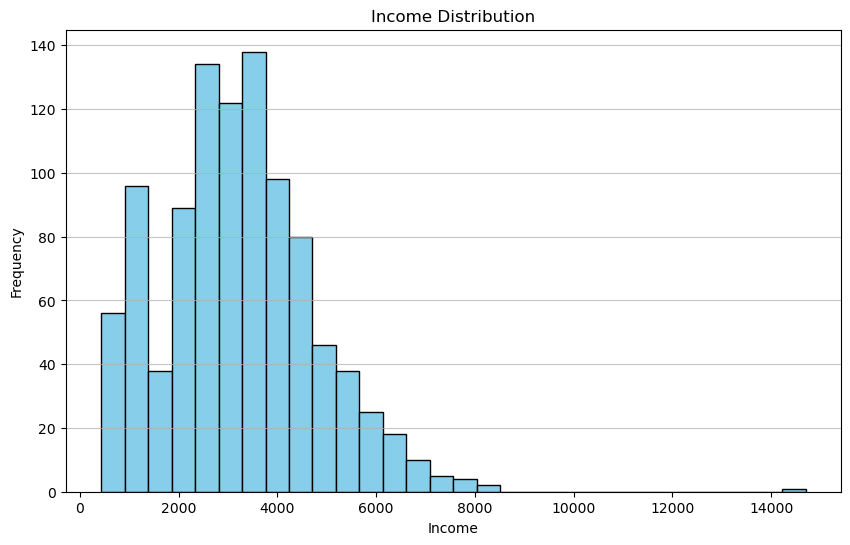

In [9]:
import matplotlib.pyplot as plt

#Ploting the income distribution
plt.figure(figsize=(10, 6))
plt.hist(df['income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#Removing outliers
upper_quantile = df['income'].quantile(0.95)

Now, drop the values from ```df```

In [10]:
df = df[df['income'] <= upper_quantile]

Finally, plot again the histogram and observe the differences

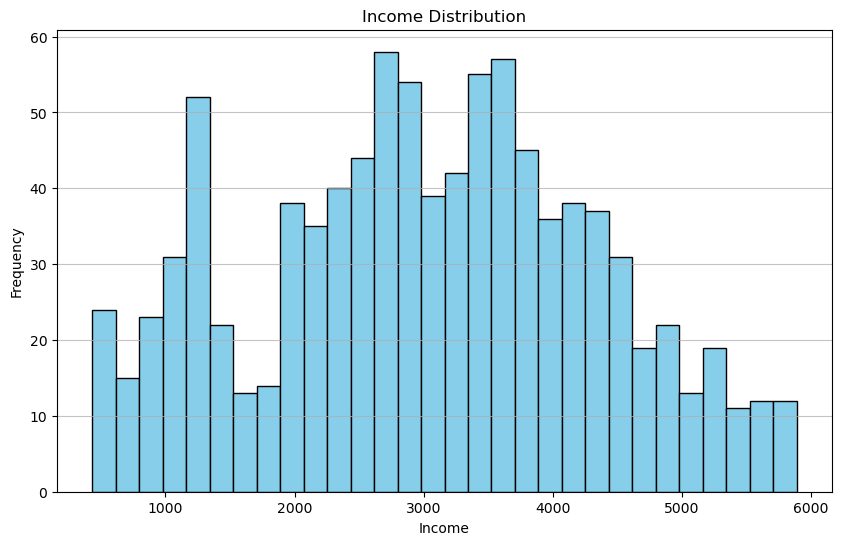

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<div class="alert alert-info"><b>Exercise 2.3</b> 

Extract the features matrix and target array from the original DataFrame and store them in two new variables ```X``` and ```y```. Use column ```income``` as the depedent variable.
</div>

In [12]:
X = df.drop(columns = ['income'])
y = df['income']

<div class="alert alert-info"><b>Exercise 2.4</b> 

Use the sklearn library to create a one-hot encoder for the ```gender``` attribute. Store the resulting information in two new columns called ```male``` and ```female``` and remove the original attribute from the dataframe.
</div>

In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop = None, sparse_output=False)
gender_encoded = onehot_encoder.fit_transform(X[['gender']])
X[['Female', 'Male']] = gender_encoded

X = X.drop(columns = ['gender'])

X

,num_children,social_class,Female,Male
0,4,Middle-Lower,1.0,0.0
1,1,Middle-Middle,0.0,1.0
2,1,Middle-Upper,0.0,1.0
3,0,Middle-Middle,0.0,1.0
4,1,Middle-Lower,0.0,1.0
...,...,...,...,...
995,1,Middle-Upper,0.0,1.0
996,4,Middle-Upper,1.0,0.0
997,0,Middle-Middle,0.0,1.0
998,1,Middle-Middle,0.0,1.0


Now, you encoded the ```gender``` attribute, you get three different columns containing the encoded values. Add them in the dataframe ```X``` with the appropriate names.

<div class="alert alert-warning">
Hint 1:  Encoded columns are in lexicographical order.
</div>
<div class="alert alert-warning">
    
Hint 2:  Remember to drop the non-encoded attribute from ```X```.
</div>

<div class="alert alert-info"><b>Exercise 2.5</b> 

Use the sklearn library to create an integer encoder for the ```social_class``` attribute.
</div>
<div class="alert alert-warning">
    
Hint: You can use the function ```value_counts()``` to retrieve the labels from the column ```social_class```.
</div>

In [14]:
from sklearn.preprocessing import OrdinalEncoder

categories = [X['social_class'].value_counts().index.tolist()]

ordinal_encoder = OrdinalEncoder(categories = categories)
social_class_encoded = ordinal_encoder.fit_transform(X[['social_class']])

Now, create a list with the ordered categories and create a new attibute called ```social_class_ENC``` inside the ```X``` dataframe

In [15]:
X['social_class_ENC'] = social_class_encoded

Finally, drop the non-encoded ```social_class``` attribute from ```X```.

In [16]:
X = X.drop(columns = ['social_class'])
X

,num_children,Female,Male,social_class_ENC
0,4,1.0,0.0,1.0
1,1,0.0,1.0,0.0
2,1,0.0,1.0,2.0
3,0,0.0,1.0,0.0
4,1,0.0,1.0,1.0
...,...,...,...,...
995,1,0.0,1.0,2.0
996,4,1.0,0.0,2.0
997,0,0.0,1.0,0.0
998,1,0.0,1.0,0.0


<div class="alert alert-info"><b>Exercise 2.6</b> 

Write the code to normalize the dataset ```X``` using the MinMaxScaler from the sklearn library.
</div>

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_normalized = min_max_scaler.fit_transform(X)

X_normalized

,num_children,Female,Male,social_class_ENC
0,0.571429,1.0,0.0,0.25
1,0.142857,0.0,1.0,0.00
2,0.142857,0.0,1.0,0.50
3,0.000000,0.0,1.0,0.00
4,0.142857,0.0,1.0,0.25
...,...,...,...,...
995,0.142857,0.0,1.0,0.50
996,0.571429,1.0,0.0,0.50
997,0.000000,0.0,1.0,0.00
998,0.142857,0.0,1.0,0.00


## Exercise 3

There is a lot of controversy about the relationship between income and ideology. Let's explore a little bit this relationship. However, before we need to pre-process a little bit the data. We have the following attributes:

* Gender
* Political_ideology
* Income
* Job_satisfaction

In the following link you can download a dataset that contains job information about different individuals.

https://raw.githubusercontent.com/jnin/information-systems/main/data/ideology_income.csv

The data are presented in a CSV format. You will need to load it using the ```read_csv``` Pandas function. 


<div class="alert alert-info"><b>Exercise 3.1</b> 

Create a dataframe called ```data``` that stores the provided data.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 3.2</b> 

Display the histogram of the ```income``` column, and decide whether or not you need to remove outliers.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 3.3</b> 

Extract the features matrix and target array from the original DataFrame and store them in two new variables ```X``` and ```y```. Use column ```job_satisfaction``` as depedent variable.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 3.4</b> 

Use the sklearn library to create an integer encoder for the ```political_ideology``` attribute.
</div>
<div class="alert alert-warning">
    
Hint: You can use the function ```value_counts()``` to retrieve the labels from the column ```social_class```.
</div>

In [ ]:
# YOUR CODE HERE

Now, create a list with the ordered categories and create a new attibute called ```political_ideology_ENC``` inside the ```X``` dataframe.

In [ ]:
# YOUR CODE HERE

Finally, drop the non-encoded ```political_ideology``` attribute from ```X```.

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 3.5</b> 

Use the sklearn library to create a one-hot encoder for the ```gender``` attribute. Observe the encoder output, and store the information in two new columns called ```female``` and ```male```.
</div>

In [ ]:
# YOUR CODE HERE

Now, you encoded the ```gender``` attribute, you get three different columns containing the encoded values. Add them in the dataframe ```X``` with the appropriate names.

<div class="alert alert-warning">
Hint 1:  Encoded columns are in lexicographical order.
</div>
<div class="alert alert-warning">
    
Hint 2:  Remember to drop the non-encoded attribute from ```X```.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 3.6</b> 

Write the code to normalize the dataset ```X``` using the StandarScaler from the sklearn library.
</div>

In [ ]:
# YOUR CODE HERE

## Exercise 4

Milk consumption is important variable to avoid aging problems. Let's analyze a little bit if there are different habits in the population. We have the following attributes:

* gender
* height
* weight
* milk

In the following link you can download a dataset that contains milk consumption data about different individuals.

https://raw.githubusercontent.com/jnin/information-systems/main/data/milk_consumption.csv

The data are presented in a CSV format. You will need to load it using the ```read_csv``` Pandas function. 

<div class="alert alert-info"><b>Exercise 4.1</b> 

Create a dataframe called ```data``` that stores the provided data.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 4.2</b> 

Extract the features matrix and target array from the original DataFrame and store them in two new variables ```X``` and ```y```. Use column ```milk``` as depedent variable.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 4.3</b> 
    
Use the sklearn library to create a one-hot encoder for the ```gender``` attribute. Observe the encoder output, and store the information in two new columns called ```female``` and ```male```.
</div>

In [ ]:
# YOUR CODE HERE

Now, you encoded the ```gender``` attribute, you get three different columns containing the encoded values. Add them in the dataframe ```X``` with the appropriate names.

<div class="alert alert-warning">
Hint 1:  Encoded columns are in lexicographical order.
</div>
<div class="alert alert-warning">
    
Hint 2:  Remember to drop the non-encoded attribute from ```X```.
</div>

In [ ]:
# YOUR CODE HERE

<div class="alert alert-info"><b>Exercise 4.4</b> 

Write the code to normalize the dataset ```X``` using the StandarScaler from the sklearn library.
</div>

In [ ]:
# YOUR CODE HERE